In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/home/nashtech/Downloads/train.csv")

# Show shape and column types
print("Dataset shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)

# Preview first few rows
df.head()


Dataset shape: (891, 12)

Column types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Summary statistics
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

In [7]:
# Fill missing values for 'Age' and 'Embarked' in one go
df.fillna({
    'Age': df['Age'].median(),
    'Embarked': df['Embarked'].mode()[0]
}, inplace=True)

# Confirm the missing values are filled
print("\n✅ Missing values after filling:")
print(df.isnull().sum())



✅ Missing values after filling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [9]:
# Group by Sex (Gender)
gender_survival = df.groupby('Sex', observed=True)['Survived'].mean()
print("Survival rate by gender:\n", gender_survival)

# Group by Pclass
class_survival = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by class:\n", class_survival)

# Create Age groups if not already created
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'MidAge', 'Senior'])

# Group by AgeGroup
agegroup_survival = df.groupby('AgeGroup', observed=True)['Survived'].mean()
print("\nSurvival rate by age group:\n", agegroup_survival)


Survival rate by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by age group:
 AgeGroup
Child     0.579710
Teen      0.381818
Adult     0.364769
MidAge    0.390625
Senior    0.227273
Name: Survived, dtype: float64


In [11]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.7 MB/s eta 0:00:004.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 17.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:0031m18.8 MB/s eta 0:00:01


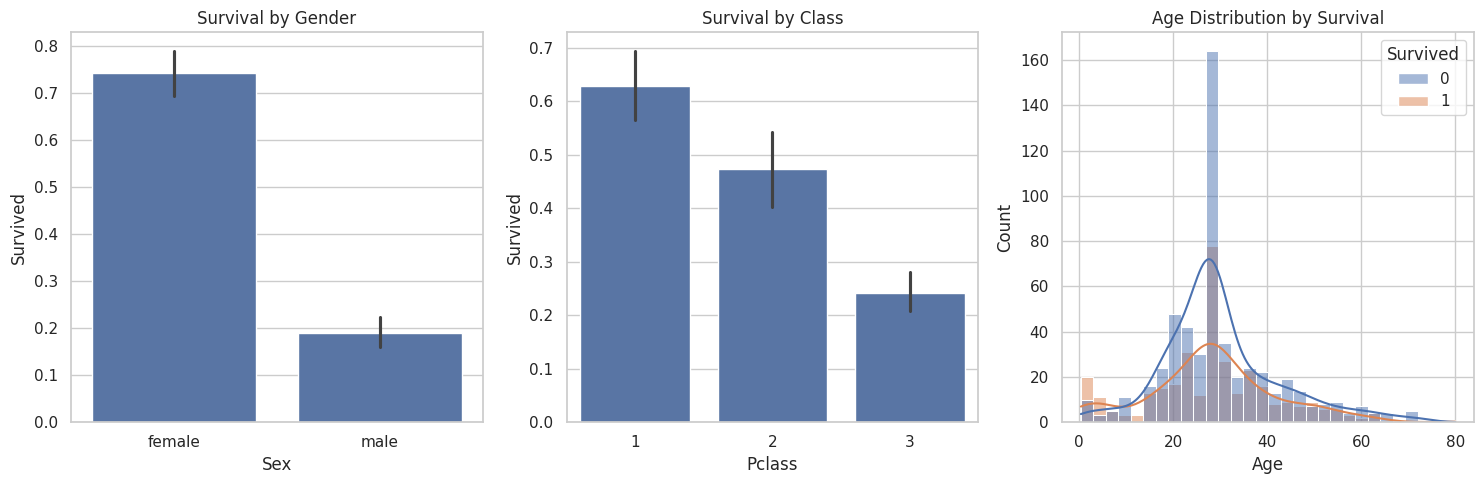

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# 1. Gender vs Survival
plt.subplot(1, 3, 1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival by Gender")

# 2. Pclass vs Survival
plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival by Class")

# 3. Age distribution
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution by Survival")

plt.tight_layout()
plt.show()
